In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading data
data = datasets.load_iris()
data, labels, feat_names = data.data, data.target, data.feature_names

data = data[ :100, :2]
labels = labels[: 100]
labels = np.apply_along_axis(lambda x: -1 if x == 0 else 1, 1, labels.reshape(-1, 1))

# splitting data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [5]:
def pegasos_optimizer(data, labels, rate, num_iter):
    data = np.array([np.append(el, [1.]) for el in data])
    weights = np.zeros(len(data[0]))

    for t in range(1, num_iter):
        i = np.random.randint(len(data))
        eta = 1./(rate*t)
        if labels[i]*((weights*data[i]).sum()) < 1.:
            weights = (1. - 1./t)*weights + eta*data[i]*labels[i]
        elif labels[i]*((weights*data[i]).sum()) >= 1.:
            weights = (1. - 1./t)*weights
            
        tmp = np.array([1., 1/np.sqrt(rate)/np.linalg.norm(weights)])
        weights = weights*tmp.min()
    
    return weights

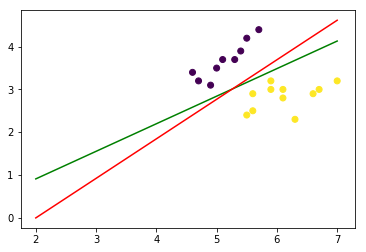

In [8]:
parameters = pegasos_optimizer(train_data, train_labels, 0.0001, 10000)

sklearn_linear = SVC(kernel='linear')
sklearn_linear.fit(train_data, train_labels)
sk_parameters = sklearn_linear.coef_[0][0], sklearn_linear.coef_[0][1], sklearn_linear.intercept_[0]

x_points = np.linspace(2, 7, 1000)
plt.plot(x_points, -parameters[2]/parameters[1]-x_points*parameters[0]/parameters[1], 'g')
plt.plot(x_points, -sk_parameters[2]/sk_parameters[1]-x_points*sk_parameters[0]/sk_parameters[1], 'r')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels)